<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png' hight=500 width=400>

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, plot_confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
sns.set(style='darkgrid', font_scale=1.5)

from scipy.stats import norm

In [3]:
df = sns.load_dataset('penguins')

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS1V8gDlBSs_W207zhzT7dF9KK1YjraOYTm-dgwxAuuFuKZOBytQGQDc13D4l4h2oay9JA&usqp=CAU" width=500>

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
df.var()

bill_length_mm           29.807054
bill_depth_mm             3.899808
flipper_length_mm       197.731792
body_mass_g          643131.077327
dtype: float64

In [11]:
df.std()

bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
dtype: float64

In [18]:
df.corr().style.background_gradient(cmap='coolwarm')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:>

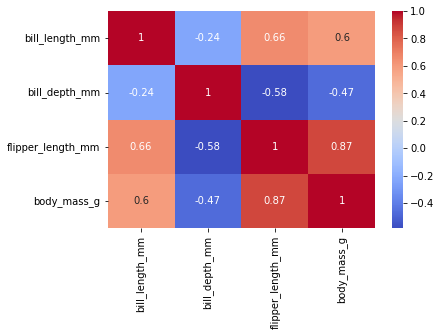

In [19]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

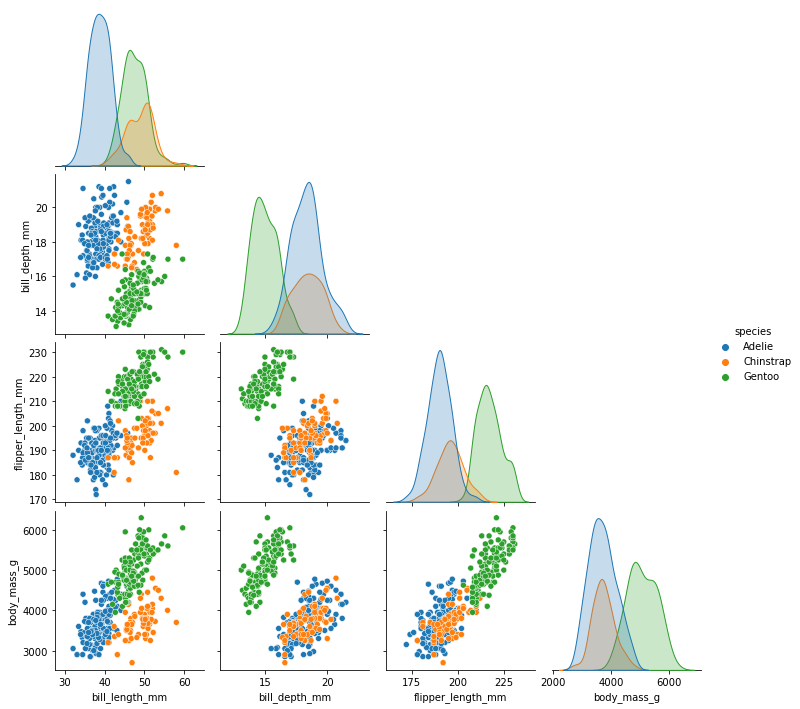

In [24]:
sns.pairplot(df, hue='species', corner=True)

In [49]:
num_features = df.select_dtypes(exclude='object').columns

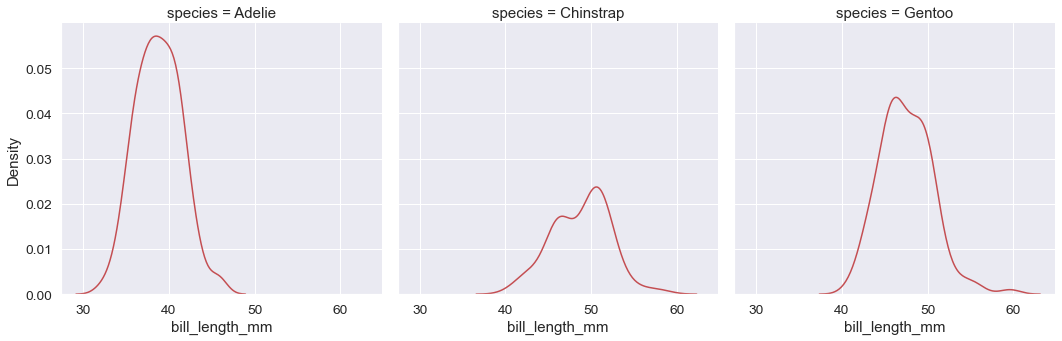

In [48]:
sns.displot(data=df, x='bill_length_mm', col='species', kind='kde', color='r')

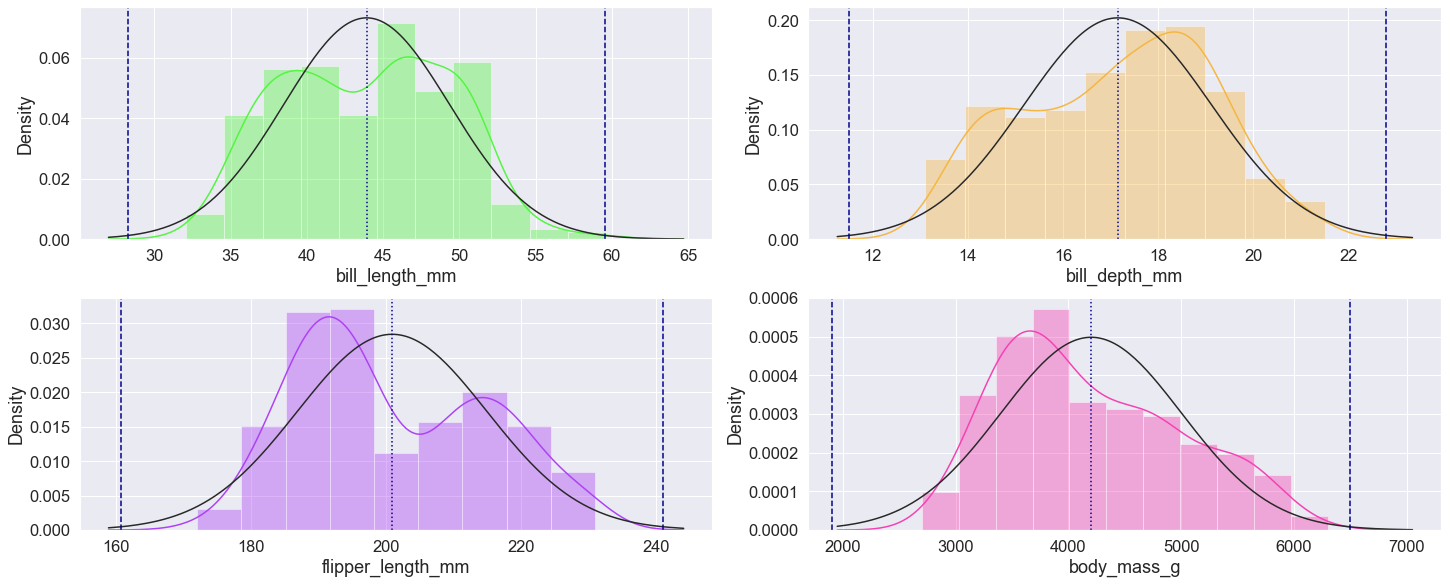

In [72]:
plt.figure(figsize=(20, 8),  layout='constrained')
palette = ['#54f542', '#f5b642', '#ad42f5', '#f542b3']
for index, col in enumerate(num_features):
    
    plt.subplot(2,2, index+1)
    sns.distplot(df[col], fit=norm, color=palette[index])
    plt.axvline(x=df[col].std() * 2.86 + df[col].mean(), linestyle='--', color='darkblue')
    plt.axvline(x=df[col].std() * -2.86 + df[col].mean(), linestyle='--', color='darkblue')
    plt.axvline(x=df[col].mean() , linestyle=':', color='darkblue');
   

In [73]:
df.describe().style.background_gradient(cmap='coolwarm')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [78]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

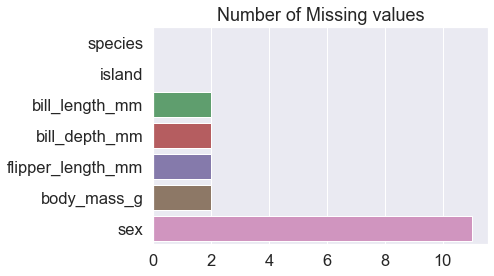

In [84]:
sns.barplot(y=df.isna().sum().index, x=df.isna().sum().values).set(title='Number of Missing values');


In [87]:
num_features

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

<AxesSubplot:xlabel='species', ylabel='count'>

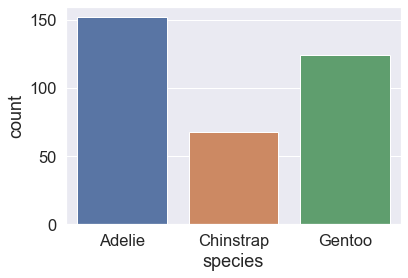

In [95]:
sns.countplot(data=df, x='species')

In [105]:
X = df.drop('species', axis=1)
y = df['species']

In [108]:
num_feature = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
num_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                            ('scaler', StandardScaler())])



cat_feature = ['sex','island']
cat_transformer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('oh', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_feature),
                                              ('cat', cat_transformer, cat_feature)])


clf = Pipeline(steps=[('preprocessor', preprocessor), ('rf', RandomForestClassifier())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [109]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                            

In [111]:
y_pred = clf.predict(X_test)

In [112]:
clf.score(X_test, y_test)

0.9903846153846154

In [113]:
clf.score(X_train, y_train)

1.0

<AxesSubplot:>

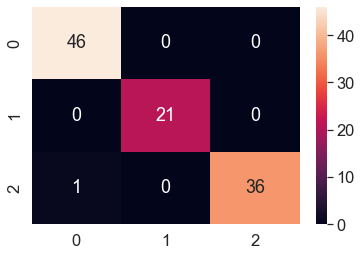

In [116]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        46
   Chinstrap       1.00      1.00      1.00        21
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

